In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


EV_data = "EVtop_sale_list.csv"
gas_data = "gas_top_sale_list.csv"
yearly = "Cali_Ev_Regular_Yearly_Price.csv"

EV_top = pd.read_csv(EV_data, encoding= "ISO-8859-1")
gas_top = pd.read_csv(gas_data, encoding= "ISO-8859-1")
yearly_price =  pd.read_csv(yearly, encoding= "ISO-8859-1")

EV = EV_top[["Manufacturer and Model","sale total"]]
gas = gas_top[["Model", "sale total"]]


EV = EV.head(10)
gas = gas.head(10)


In [2]:

top_sale = gas

top_sale = top_sale.rename(columns={"Model":"Top 10 sale Gasoline Car", "sale total": "Sale Total for Gasoline Car"}) 
top_sale["Top 10 sale EV Car"] = EV["Manufacturer and Model"]
top_sale["Sale Total for EV Car"] = EV["sale total"]
place = ["Top 1","Top 2","Top 3","Top 4","Top 5","Top 6","Top 7","Top 8","Top 9","Top 10",]
top_sale["Top 10 Place"] = place 

top_sale = top_sale.set_index("Top 10 Place")  
top_sale 

,Top 10 sale Gasoline Car,Sale Total for Gasoline Car,Top 10 sale EV Car,Sale Total for EV Car
Top 10 Place,,,,
Top 1,Ford F-Series,787372.0,Tesla Model 3,163500.0
Top 2,Chevrolet Silverado,593057.0,Hyundai Kona,76253.0
Top 3,Ram Pickup,563676.0,Tesla Model Y,35000.0
Top 4,Toyota RAV4,430387.0,Chevrolet Bolt,20753.0
Top 5,Honda CR-V,323502.0,Tesla Model S,15300.0
Top 6,Toyota Camry,294348.0,Tesla Model X,15100.0
Top 7,Chevrolet Equinox,270994.0,Hyundai Ioniq,13570.0
Top 8,Honda Civic,261225.0,Nissan Leaf,9559.0
Top 9,GMC Sierra,253014.0,Audi eTron,7202.0


In [3]:
top10 = top_sale[["Top 10 sale Gasoline Car","Top 10 sale EV Car"]]
top10 

,Top 10 sale Gasoline Car,Top 10 sale EV Car
Top 10 Place,,
Top 1,Ford F-Series,Tesla Model 3
Top 2,Chevrolet Silverado,Hyundai Kona
Top 3,Ram Pickup,Tesla Model Y
Top 4,Toyota RAV4,Chevrolet Bolt
Top 5,Honda CR-V,Tesla Model S
Top 6,Toyota Camry,Tesla Model X
Top 7,Chevrolet Equinox,Hyundai Ioniq
Top 8,Honda Civic,Nissan Leaf
Top 9,GMC Sierra,Audi eTron


base on the popularity we decide to make Tesla Model 3 for EV car and Ford F-Series for gasoline car for our candidates

Text(0, 0.5, 'Sale Total')

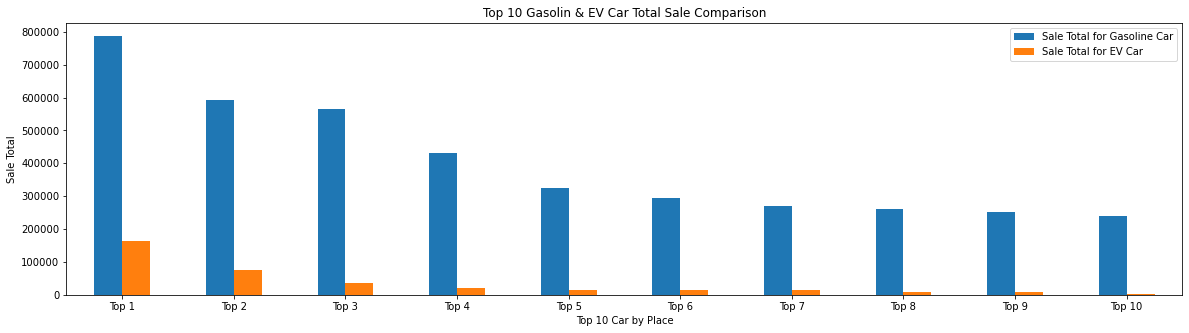

In [4]:
plot = top_sale.plot(kind="bar", figsize=(20,5))
plt.xticks(rotation = "horizontal")
plt.title("Top 10 Gasolin & EV Car Total Sale Comparison")
plt.xlabel("Top 10 Car by Place")
plt.ylabel("Sale Total")

just by looking at the total sale for EV car and Gasoline car, 
we can see there is still huge difference, still way more people choose to buy gasoline car, but does that mean EV car not worth to buy?
not necessary, we need to take every factor into our consideration.  

let's talk about price.

In [97]:
EV_list = yearly_price.loc[yearly_price["Model"]== "Tesla Model 3", ["List Pricing"]]
EV_yearly = yearly_price.loc[yearly_price["Model"]== "Tesla Model 3", ["Yearly_EV_Price_Cali"]]
gas_list = yearly_price.loc[yearly_price["Model"]== "Ford F-Series", ["List Pricing"]]
gas_yearly = yearly_price.loc[yearly_price["Model"]== "Ford F-Series", ["Yearly_Gas_Price_Cali"]]


dictionary = {"Candidates": ["Tesla Model 3", "Ford F-Series"]}

price = pd.DataFrame(dictionary)
price["List Price"] = ""
price["Cost of Charge/Gasoline Spent per Year"] = ""

price.loc[price["Candidates"]=="Tesla Model 3",["List Price"]] = EV_list.iloc[0]["List Pricing"]
price.loc[price["Candidates"]=="Tesla Model 3",["Cost of Charge/Gasoline Spent per Year"]] =EV_yearly.iloc[0]["Yearly_EV_Price_Cali"]

price.loc[price["Candidates"]=="Ford F-Series",["List Price"]] = gas_list.iloc[0]["List Pricing"]
price.loc[price["Candidates"]=="Ford F-Series",["Cost of Charge/Gasoline Spent per Year"]] =gas_yearly.iloc[0]["Yearly_Gas_Price_Cali"]




price["List Price"] = price["List Price"].str.replace(",", "").str.replace("$","").astype(int)
price["Cost of Charge/Gasoline Spent per Year"] = pd.to_numeric(price["Cost of Charge/Gasoline Spent per Year"], downcast="float")


price

,Candidates,List Price,Cost of Charge/Gasoline Spent per Year
0,Tesla Model 3,37990,687.192627
1,Ford F-Series,28745,2158.688721


In [98]:
price.dtypes

Candidates                                 object
List Price                                  int32
Cost of Charge/Gasoline Spent per Year    float32
dtype: object

In [131]:
evlist = price.loc[price["Candidates"]=="Tesla Model 3",["List Price"][0]]
gaslist = price.loc[price["Candidates"]=="Ford F-Series",["List Price"][0]]

ev_year_price =  price.loc[price["Candidates"]=="Tesla Model 3",["Cost of Charge/Gasoline Spent per Year"][0]]
gas_year_price = price.loc[price["Candidates"]=="Ford F-Series",["Cost of Charge/Gasoline Spent per Year"][0]]


EVcar_cost_year1to10 = []
gascar_cost_year1to10 = []

for a in range(1,11):
    cost_from_begin = round(evlist.iloc[0] + ev_year_price.iloc[0]*a ,2)
    EVcar_cost_year1to10.append(cost_from_begin)
    
    
for b in range(1,11):
    cost_from_begin = round(gaslist.iloc[0] + gas_year_price.iloc[0]*b ,2)
    gascar_cost_year1to10.append(cost_from_begin)
    

In [140]:
dictionary = {"Total Cost through the Years": ["Year1","Year2","Year3","Year4","Year5","Year6","Year7","Year8","Year9","Year10"]}

cost = pd.DataFrame(dictionary)

cost["Tesla Model 3"] = EVcar_cost_year1to10
cost["Ford F-Series"] = gascar_cost_year1to10


In [141]:
# cost = cost.set_index("Total Cost through the Years")
cost

,Total Cost through the Years,Tesla Model 3,Ford F-Series
0,Year1,38677.19,30903.69
1,Year2,39364.39,33062.38
2,Year3,40051.58,35221.07
3,Year4,40738.77,37379.75
4,Year5,41425.96,39538.44
5,Year6,42113.16,41697.13
6,Year7,42800.35,43855.82
7,Year8,43487.54,46014.51
8,Year9,44174.73,48173.20
9,Year10,44861.93,50331.89


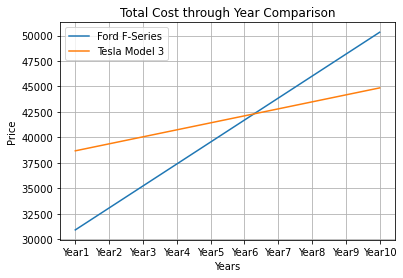

In [165]:
ford, = plt.plot(cost["Total Cost through the Years"], cost["Ford F-Series"], label = "Ford F-Series")
tesla, =plt.plot(cost["Total Cost through the Years"], cost["Tesla Model 3"], label = "Tesla Model 3")
plt.title("Total Cost through Year Comparison") 
plt.xlabel("Years") 
plt.ylabel("Price") 
plt.legend(loc="upper left")
plt.grid()


the break point is a little after 6 year, so if you are thinking to keep the car for more than 6 year,Tesla Model3 would save you more money. 